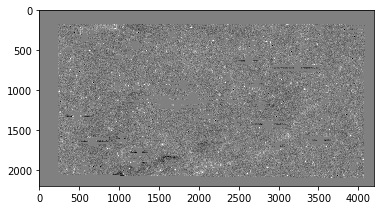

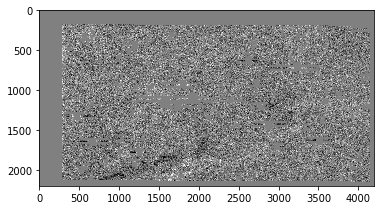

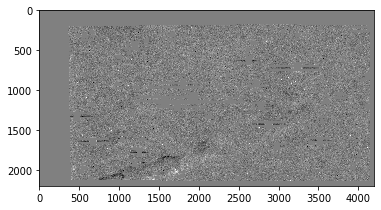

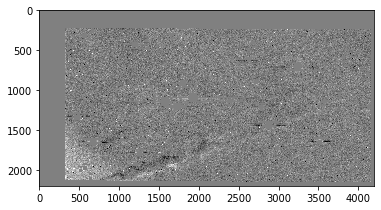

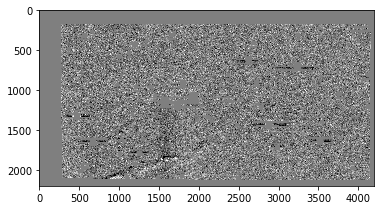

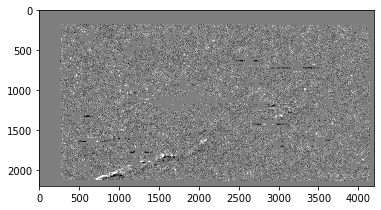

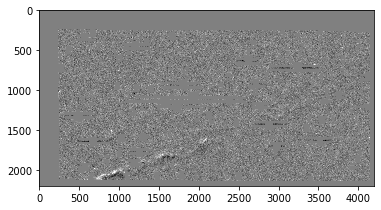

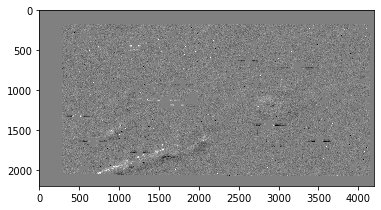

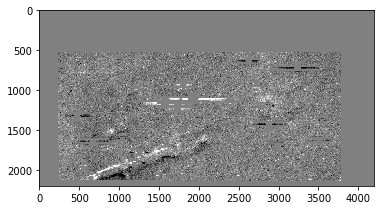

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 21 18:30:55 2019

@author: roeeyairpartoush
"""
# %%
import numpy as np
from scipy import signal as sp
from scipy import interpolate as intp
# Set up matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
from astropy.io import fits
#from astropy.utils import data
#from astropy.utils.data import download_file
#from astropy.utils.data import get_readable_fileobj
#from astropy.utils.data import get_file_contents
import LeTools_Module as LeT

# %

home_dir = '/Users/roeepartoush/Downloads/Roee/2/'
prefix = 'tyc4419.VR.'
midfix = '_'#'_R.'
sufix = '_2.diff'
tmplt_img = '20140923.149398'#'20150211.157400'

#image_files = ['20150814.64482'     ,
#               '20150817.564744'    ,
#               '20150817.564745'    ,
#               '20150911.165398'    ,
#               '20150911.165399'     ]

image_files = ['20120118.216797'    ,
               '20120626.24973'     ,
               '20130109t.1692969'  ,
               '20130826.33218'     ,
               '20140621.103815'    ,
               '20141223.54713'     ,
               '20150211.157395'    ,
               '20150814.64482'     ,
               '20150911.165399'     ]

# % ================!!!!!!!===============
plt.close('all')
[image_data, mask_img, noise_img, aximg] = LeT.load_difimg(home_dir, prefix, midfix, sufix, tmplt_img, image_files)
IMmat = np.asarray(image_data)
meanImg = np.mean(IMmat,0)
# %%
#plt.close('all')
#[image_data, aximg] = LeT.plot_dif(meanImg, image_data)
# %%


ValueError: Axes instance argument was not found in a figure

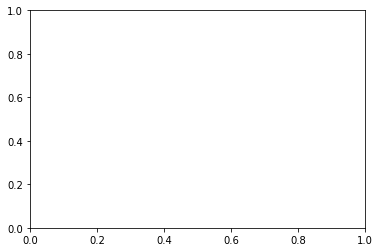

In [3]:
point=np.array([[1600.0],[1850.0]])
#[s_mat, zzz] = LeT.plot_cut(image_data,np.array([7,8]),np.array([[1600.0],[1850.0]]),70,600,aximg,15)
[s_mat, zzz] = LeT.plot_cut(image_data, mask_img, noise_img, np.arange(len(image_files)),point,70,600,aximg,15)
#s_mat[np.absolute(s_mat)<20] = s_mat[np.absolute(s_mat)<20]*0.2

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

[Xm, Ym] = np.meshgrid(np.arange(s_mat.shape[1]),LeT.flnm2time(image_files))
X=Xm.flatten()
Y=Ym.flatten()
Z=s_mat.flatten()

ax = Axes3D(fig)
ax.plot(X,Y,Z,color='gray',linewidth=1)
ax.scatter(X,Y,Z,s=1,c=Z,cmap='jet')



# %%
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

[Xm, Ym] = np.meshgrid(np.arange(s_mat.shape[1]),LeT.flnm2time(image_files))
X=Xm.flatten()
Y=Ym.flatten()
Z=s_mat.flatten()
#plt.scatter(Xm.flatten(),Ym.flatten(),s=1,c=Z.flatten(),cmap='jet')

ax = Axes3D(fig)
#ax.plot(X,Y,Z,linestyle='none',marker='.',markersize=1)
ax.scatter(X,Y,Z,s=1,c=Z,cmap='jet')
#ax.plot_wireframe(Xm,Ym,s_mat)
#ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
#cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

# %%
#from mpl_toolkits.mplot3d import axes3d
#import matplotlib.pyplot as plt
#from matplotlib import cm
#
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#X, Y, Z = axes3d.get_test_data(0.05)
#ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
#cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)
#
#ax.set_xlabel('X')
#ax.set_xlim(-40, 40)
#ax.set_ylabel('Y')
#ax.set_ylim(-40, 40)
#ax.set_zlabel('Z')
#ax.set_zlim(-100, 100)
#
#plt.show()

# %%
ind=8

clim = 50
plt.figure(ind+1)
plt.imshow(image_data[ind], cmap='gray', vmin=-clim, vmax=clim)
#plt.colorbar()
plt.figure(ind+10)
#plt.xlabel('AL NA TOMAR INEE DARKI AHAHRONA,ET OR AIOM ESTIRO PNEI HAANANA!HA HA HA ')
#plt.ylabel('NEVER AGAIN!HA HA HA ')

#(z1,z2,z3)=plt.hist(image_data[ind].flatten(),bins=np.unique(image_data))

# %%

plt.figure()

inds=[0,1]

image_sum = np.zeros(image_data[0].shape)
for i in inds:
    image_sum = image_sum + image_data[i]

image_sum = image_sum/(i+1)
plt.figure(500)
plt.imshow(image_sum, cmap='gray', vmin=-clim, vmax=clim)    
# %%
point = np.array([[1520.0],[1760.0]])

angle = np.radians(70);
unitvec = np.array([[np.cos(angle)],[np.sin(angle)]])
uninorm = np.array([[np.sin(angle)],[-np.cos(angle)]])

lnlen = 200;

#vec = np.round(np.linspace(point-unitvec*lnlen/2,point+unitvec*lnlen/2,np.floor(lnlen)+1))
vec = (np.squeeze(np.linspace(point-unitvec*lnlen/2,point+unitvec*lnlen/2,np.floor(lnlen)+1),2))
vec2 = np.concatenate((np.reshape(np.floor(vec[:,0]),(vec.shape[0],1)),np.reshape(vec[:,1],(vec.shape[0],1))),1)
#vec = np.round(np.squeeze(np.linspace(point-uninorm*lnlen/2,point+uninorm*lnlen/2,np.floor(lnlen)+1),2))
#x=np.round(vec)
#plt.sca(ax_img[8])
#plt.scatter(vec[:,0],vec[:,1])

# %%
Btch = 10
stp = 1.0

point = np.array([[1780.0],[1560.0]])

#ind = 0
#imimim = image_data[ind]
#smp_sum = np.zeros(img_smp.shape)

for i in np.arange(Btch):
    point_t = point+uninorm*stp*(i+5)
    vec = np.round(np.squeeze( np.linspace(point_t-unitvec*lnlen/2, point_t+unitvec*lnlen/2, np.floor(lnlen)+1), 2) )
    plt.figure(ind+1)
    plt.scatter(vec[:,0],vec[:,1],s=2)
    
    img_dt_ind = imimim.flatten();
    inds = np.ravel_multi_index([vec[:,1].astype(int),vec[:,0].astype(int)], (2200,4200))
    img_smp = img_dt_ind[inds]
    smp_sum = smp_sum + img_smp
    
    hh = plt.figure(300)
    ax1 = hh.add_subplot(211)
    plt.plot(np.arange(inds.size),img_smp)
    
#plt.figure(301)
ax2 = hh.add_subplot(212, sharex=ax1, sharey=ax1)
plt.plot(np.arange(inds.size),smp_sum/(i+1))
# %%
imimim = image_sum
#imimim = image_data[2]
#imimim = img_flt
img_dt_ind = imimim.flatten();
inds = np.ravel_multi_index([vec[:,1].astype(int),vec[:,0].astype(int)], (2200,4200))
#img_dt_ind[inds] = 10;
img_smp = img_dt_ind[inds]

#f = intp.interp2d(np.arange(4200),np.arange(2200), imimim, kind='linear')
#img_smp = f(vec[:,0],vec[:,1])

#N = 1000
#S = 4500000
#plt.scatter(np.arange(N),img_dt_ind[S:(S+N)])
#img_dt_ind = np.reshape(img_dt_ind,(2200,4200))
#plt.imshow(img_dt_ind, cmap='gray')
hh = plt.figure(300)
#plt.plot(np.arange(inds.size),img_smp.flatten()[np.arange(0,201*201-1+202,202)])
plt.plot(np.arange(inds.size),img_smp)

# %%
img_fft2 = np.fft.fft2(image_data_tmp)
#plt.imshow(np.fft.fftshift(np.log10(np.abs(img_fft2))),extent=[-0.5,0.5,-0.5,0.5], cmap='gray')
plt.imshow(np.fft.ifft2(img_fft2))
plt.colorbar()

# %%
fx = np.linspace(-0.5,0.5,4200)
fy = np.linspace(-0.5,0.5,2200)

fxm, fym = np.meshgrid(fx,fy)
ind_bool = np.fft.ifftshift(np.sqrt(np.power(fym,2)+np.power(fxm,2))>0.05);
#plt.imshow(ind_bool, cmap='gray', extent=[-0.5,0.5,-0.5,0.5])
img_fft2_flt = img_fft2
img_fft2_flt[ind_bool]=0.001
#plt.imshow(np.fft.fftshift(np.log10(np.abs(img_fft2_flt))), cmap='gray', extent=[-0.5,0.5,-0.5,0.5])
#plt.colorbar()
# %%
img_dt_ind = image_data_tmp.flatten();
img_dt_ind[np.ravel_multi_index([vec[:,1].astype(int),vec[:,0].astype(int)], (2200,4200))] = 10;
#N = 1000
#S = 4500000
#plt.scatter(np.arange(N),img_dt_ind[S:(S+N)])
img_dt_ind = np.reshape(img_dt_ind,(2200,4200))
plt.imshow(img_dt_ind, cmap='gray')

# %%
img_flt = sp.medfilt(image_data_tmp,3)
f = plt.figure(17)
plt.imshow(img_flt, cmap='gray')
plt.colorbar()

# %%

import sys
import numpy as np
import matplotlib.pyplot as plt


def press(event):
    print('press', event.key)
    sys.stdout.flush()
    if event.key == 'x':
        visible = xl.get_visible()
        xl.set_visible(not visible)
        fig.canvas.draw()

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

fig.canvas.mpl_connect('key_press_event', press)

ax.plot(np.random.rand(12), np.random.rand(12), 'go')
xl = ax.set_xlabel('easy come, easy go')
ax.set_title('Press a key')
plt.show()